#### New to Plotly?
Plotly's Python library is free and open source! [Get started](https://plot.ly/python/getting-started/) by downloading the client and [reading the primer](https://plot.ly/python/getting-started/).
<br>You can set up Plotly to work in [online](https://plot.ly/python/getting-started/#initialization-for-online-plotting) or [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode, or in [jupyter notebooks](https://plot.ly/python/getting-started/#start-plotting-online).
<br>We also have a quick-reference [cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) (new!) to help you get started!


#### Creating a Plotly Grid
You can instantiate a grid with data by either uploading tabular data to Plotly or by creating a Plotly `grid` using the API. To upload the grid we will use `plotly.plotly.grid_ops.upload()`. It takes the following arguments:
- `grid` (Grid Object): the actual grid object that you are uploading.
- `filename` (str): name of the grid in your plotly account,
- `world_readable` (bool): if `True`, the grid is `public` and can be viewed by anyone in your files. If `False`, it is private and can only be viewed by you. 
- `auto_open` (bool): if determines if the grid is opened in the browser or not.

You can run `help(py.grid_ops.upload)` for a more detailed description of these and all the arguments.

In [1]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
from plotly.grid_objs import Column, Grid

import datetime
import numpy as np
from IPython.display import Image

column_1 = Column([1, 2, 3], 'column 1')
column_2 = Column(['a', 'b', datetime.datetime.now()], 'column 2') # Tabular data can be numbers, strings, or dates
grid = Grid([column_1, column_2])
url = py.grid_ops.upload(grid, filename='grid_ex_6', world_readable=True, auto_open=True)
print(url)

https://plot.ly/~PythonPlotBot/370/


#### View and Share your Grid
You can view your newly created grid at the `url`:

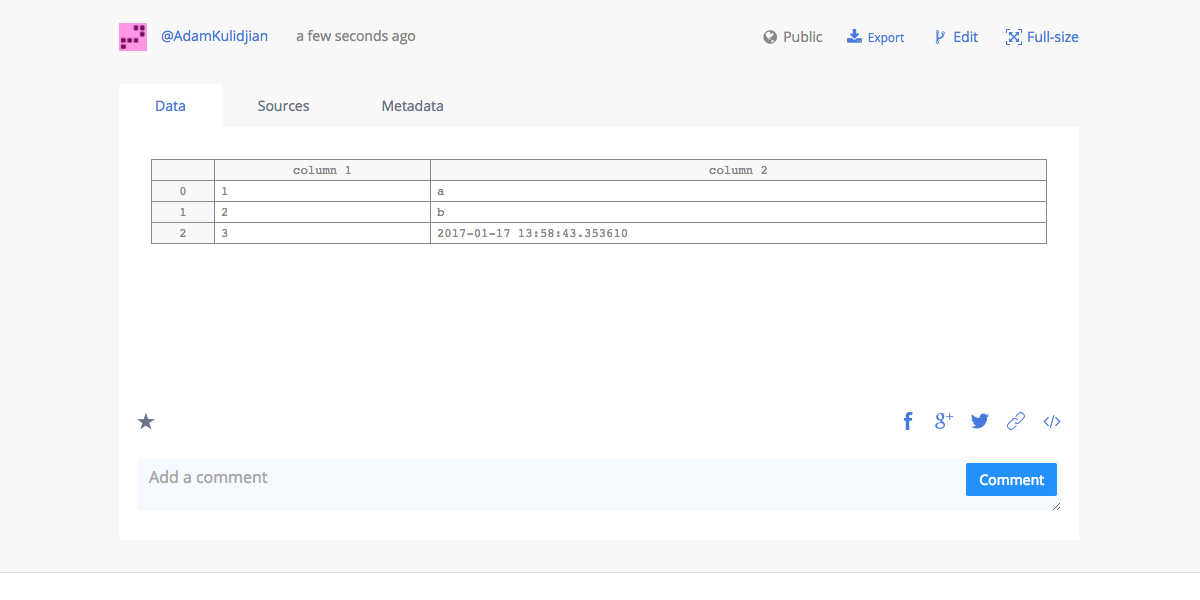

In [3]:
Image('view_grid_url.png')

You are also able to view the grid in your list of files inside `Organize` and in your profile if the grid is `public`:

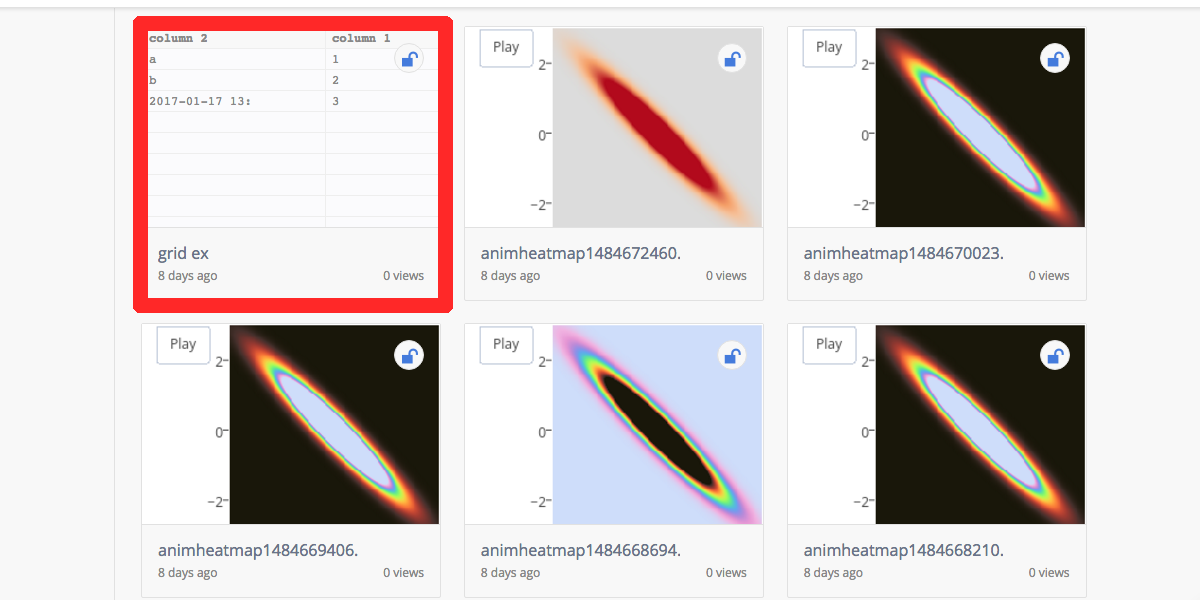

In [4]:
Image('view_in_organize.png')

#### Upload Dataframes to Plotly
Along with uploading a grid, you can upload a Dataframe as well as convert it to raw data as a grid:

In [7]:
import plotly.plotly as py
import plotly.figure_factory

import pandas_datareader.data as web
from datetime import datetime

df = web.DataReader("aapl", 'yahoo', datetime(2007, 10, 1), datetime(2009, 4, 1))
df_head = df.head(6)
table = plotly.figure_factory.create_table(df_head)
py.iplot(table, filename='dataframe_ex_preview')

In [8]:
grid = Grid([Column(df[column_name], column_name) for column_name in df.columns])
url = py.grid_ops.upload(grid, filename='dataframe_ex_2', world_readable=True, auto_open=True)
print(url)

https://plot.ly/~PythonPlotBot/373/


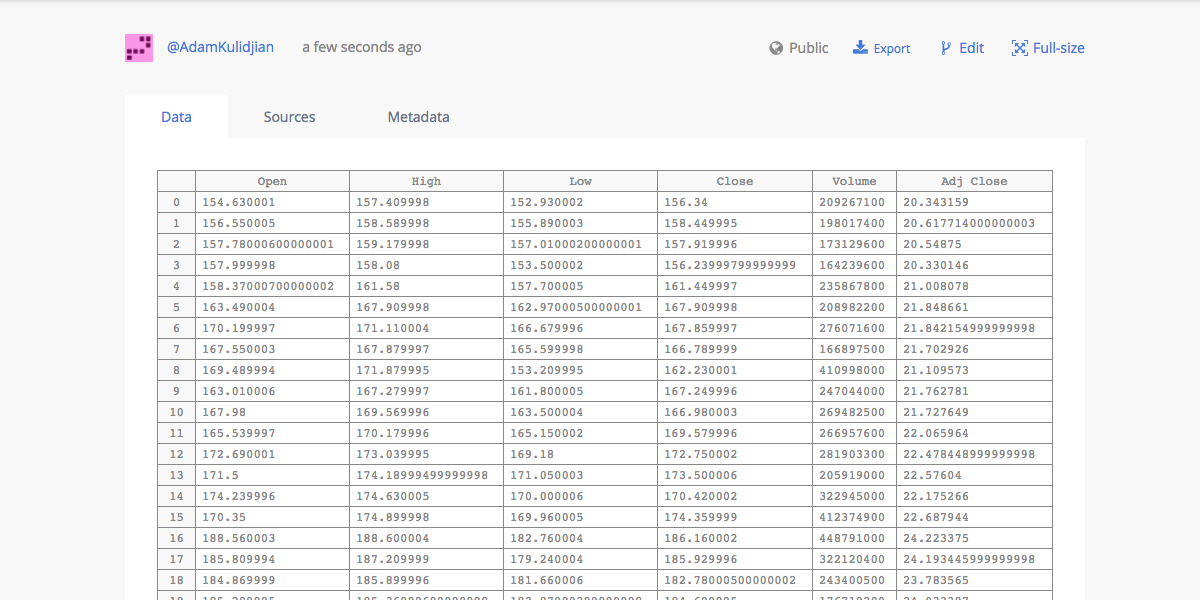

In [9]:
Image('dataframe_view.png')

#### Making Graphs from Grids
Plotly graphs are usually described with data embedded in them. For example, here we place `x` and `y` data directly into our `Histogram2dContour` object:

In [10]:
x = np.random.randn(1000)
y = np.random.randn(1000) + 1

data = Data([
    Histogram2dContour(
        x=x,
        y=y
    )
])

py.iplot(data, filename='Example 2D Histogram Contour')

We can also create graphs based off of references to columns of grids.  Here, we'll upload several `column`s to our Plotly account:

In [11]:
column_1 = Column(np.random.randn(1000), 'column 1')
column_2 = Column(np.random.randn(1000)+1, 'column 2')
column_3 = Column(np.random.randn(1000)+2, 'column 3')
column_4 = Column(np.random.randn(1000)+3, 'column 4')

grid = Grid([column_1, column_2, column_3, column_4])
url = py.grid_ops.upload(grid, filename='randn_with_integer_offset_2')
print(url)

https://plot.ly/~PythonPlotBot/376/


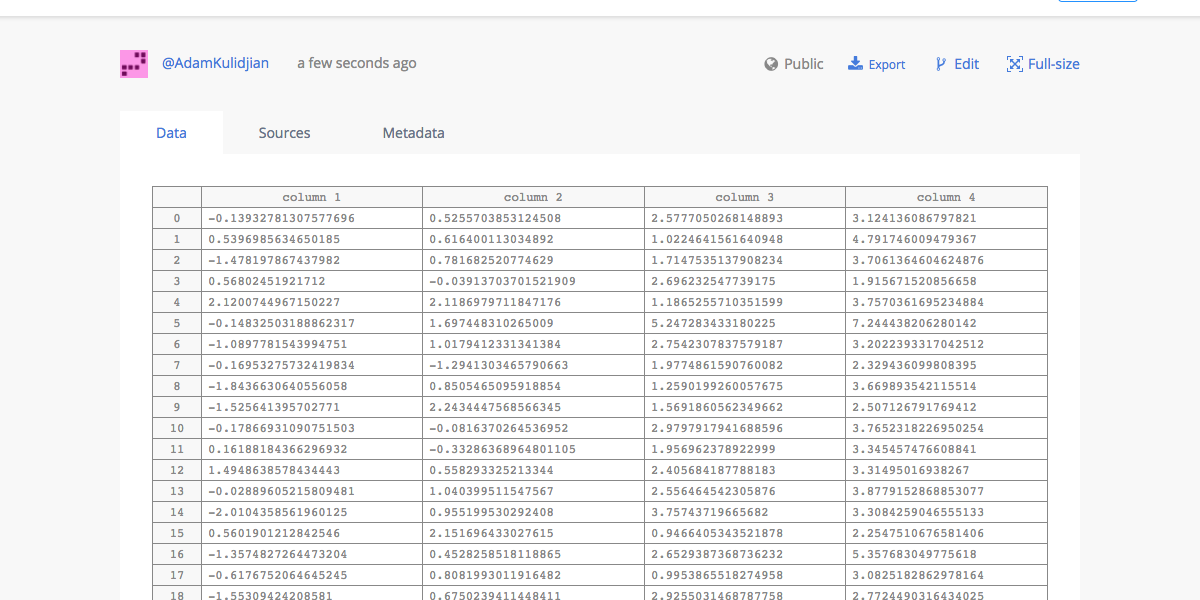

In [12]:
Image('rand_int_histogram_view.png')

#### Make Graph from Raw Data
Instead of placing data into `x` and `y`, we'll place our Grid columns into `xsrc` and `ysrc`:

In [13]:
data = Data([
    Histogram2dContour(
        xsrc=grid[0],
        ysrc=grid[1]
    )
])

py.iplot(data, filename='2D Contour from Grid Data')

So, when you view the data, you'll see your original grid, not just the columns that compose this graph:

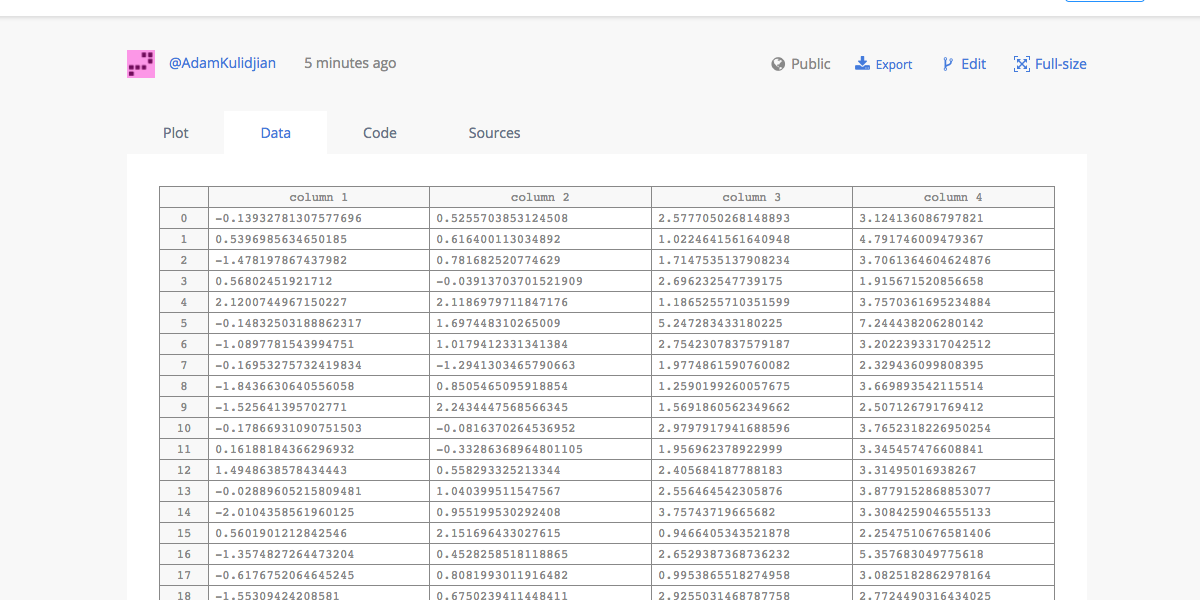

In [14]:
Image('graph_from_raw_data_view.png')

#### Attaching Meta Data to Grids
In [Plotly Enterprise](https://plot.ly/product/enterprise/), you can upload and assign free-form JSON `metadata` to any grid object. This means that you can keep all of your raw data in one place, under one grid.

If you update the original data source, in the workspace or with our API, all of the graphs that are sourced from it will be updated as well. You can make multiple graphs from a single Grid and you can make a graph from multiple grids. You can also add rows and columns to existing grids programatically.

In [15]:
meta = {
    "Month": "November",
    "Experiment ID": "d3kbd",
    "Operator": "James Murphy",
    "Initial Conditions": {
          "Voltage": 5.5
    }
}

grid_url = py.grid_ops.upload(grid, filename='grid_with_metadata_2', meta=meta)
print(url)

https://plot.ly/~PythonPlotBot/376/


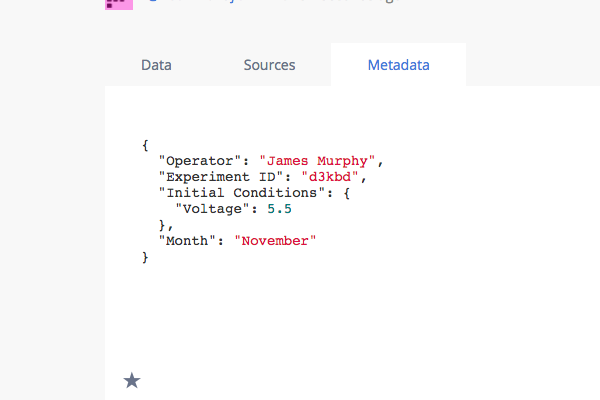

In [16]:
Image('metadata_view.png')

#### Reference

In [17]:
help(py.grid_ops)

Help on class grid_ops in module plotly.plotly.plotly:

class grid_ops
 |  Interface to Plotly's Grid API.
 |  Plotly Grids are Plotly's tabular data object, rendered
 |  in an online spreadsheet. Plotly graphs can be made from
 |  references of columns of Plotly grid objects. Free-form
 |  JSON Metadata can be saved with Plotly grids.
 |  
 |  To create a Plotly grid in your Plotly account from Python,
 |  see `grid_ops.upload`.
 |  
 |  To add rows or columns to an existing Plotly grid, see
 |  `grid_ops.append_rows` and `grid_ops.append_columns`
 |  respectively.
 |  
 |  To delete one of your grid objects, see `grid_ops.delete`.
 |  
 |  Class methods defined here:
 |  
 |  append_columns(cls, columns, grid=None, grid_url=None) from __builtin__.classobj
 |      Append columns to a Plotly grid.
 |      
 |      `columns` is an iterable of plotly.grid_objs.Column objects
 |      and only one of `grid` and `grid_url` needs to specified.
 |      
 |      `grid` is a ploty.grid_objs.Gri

In [18]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install git+https://github.com/plotly/publisher.git --upgrade
import publisher
publisher.publish(
    'grid-api.ipynb', 'python/data-api/', 'Upload Data to Plotly from Python',
    'How to upload data to Plotly from Python with the Plotly Grid API.',
    title = 'Plotly Data API', name = 'Plots from Grids',
    language='python', has_thumbnail='true', thumbnail='thumbnail/table.jpg', display_as='file_settings'
)

/usr/local/lib/python2.7/site-packages/IPython/nbconvert.py:13: ShimWarning:

The `IPython.nbconvert` package has been deprecated. You should import from nbconvert instead.

/usr/local/lib/python2.7/site-packages/publisher/publisher.py:53: UserWarning:

Did you "Save" this notebook before running this command? Remember to save, always save.

